# How to read KBonus-BKG light curves with LightKurve

This tutorial shows how to download, read, and work with MAST HLSP [KBonus-BKG](https://archive.stsci.edu/hlsp/kbonus-bkg). These light curves were extracted using PSF photometry for >600,000 sources recorded in the Kepler Target Pixel Files (TPFs). The extraction process and light curve creation are explained in [Martinez-Palomera et al. 2023](https://ui.adsabs.harvard.edu/abs/2023arXiv231017733M/abstract) 

In [1]:
# basic imports
import numpy as np
import matplotlib.pyplot as plt

import lightkurve as lk

/Users/jorgemarpa/Work/public_repos/lightkurve/src/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/jorgemarpa/.lightkurve/cache. Please move all the files in the legacy directory /Users/jorgemarpa/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


## 1. Download KBonus-BKG light curve

First, let's search for Kepler 686 target in the data base:

In [76]:
lk.search_lightcurve("Kepler-686", mission="Kepler", author="KBONUS-BKG")

#,mission,sequence,author,product_type,exptime,target_name,distance,start_time,end_time
,,,,,s,,arcsec,,
0,Kepler,,KBONUS-BKG,HLSP,1800,Gaia DR3 2100247945575646336,0.0,2009-05-02,2013-05-11
...,...,...,...,...,...,...,...,...,...
17,Kepler,Quarter 16,KBONUS-BKG,HLSP,1800,Gaia DR3 2100247945575646336,0.0,--,--
18,Kepler,Quarter 17,KBONUS-BKG,HLSP,1800,Gaia DR3 2100247945575646336,0.0,--,--


The first row in the table is the stitched light curve, which is the default in the KBonu-BKG files.
The following are quarters 0 to 17 from Kepler. Here all quarters are listed.
This behavior is because the KBonus-BKG FITS files are multi-extension, the primary extension has the stitched light curve, and there are multiple other extensions with the quarter data.
Notice the `target_name` is a Gaia designation, this is because KBonus-BKG used Gaia DR3 as the input catalog, it contains sources with no KIC value, therefore Gaia identifiers were used. The `start_time` and `end_time` indicates the file contains multiple quarters, we will explore this later.

In [77]:
lc = lk.search_lightcurve("Kepler-686", mission="Kepler", author="KBONUS-BKG").download()
# get the file path
lc.filename

/Users/jorgemarpa/Work/public_repos/lightkurve/src/lightkurve/search.py:480: LightkurveWarning: Warning: 19 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


'/Users/jorgemarpa/.lightkurve/cache/mastDownload/HLSP/hlsp_kbonus-bkg_kepler_kepler_kic-003935914_kepler_v1.0/hlsp_kbonus-bkg_kepler_kepler_kic-003935914_kepler_v1.0_lc.fits'

By default the download function returns the stitched light cuve in KBonus-BKG. A warning is raised because the table contains multiple entries, but only one was loaded. 

In [78]:
lc

time,flux,flux_err,cadenceno,quarter,sap_flux,sap_flux_err,psf_flat_flux,psf_flat_flux_err,sap_quality,flatten_mask
,electron / s,electron / s,,,electron / s,electron / s,electron / s,electron / s,,
Time,float64,float64,int32,int64,float64,float64,float64,float64,int32,int32
169.7659579482861,8043.647435275865,3.2835956679785623,2977,2,7016.037236598841,4.0224831177088785,8027.20819185659,3.529999591175291,393216,0
...,...,...,...,...,...,...,...,...,...,...
1591.001940023154,7999.584768396891,3.585310710180754,72531,17,6959.220298342009,3.172842616228903,8014.880975367801,3.844991393683759,0,0


The light curve contains 5,9073 cadences. There are multiple columns in the table:
 - `time`: time array in BKJD
 - `flux`: default flux column, this is the corrected PSF photometry stitched from all quarters
 - `flux_err`: default flux error column
 - `cadenceno`: cadence number value from the TPF
 - `quarter`: observing quarter
 - `sap_flux`: aperture flux
 - `sap_flux_err`: aperture flux error
 - `psf_flat_flux`: corrected PSF flux that was flattened with a b-spline model, useful for transit detections
 - `psf_flat_flux_err`: corrected PSF flux error from the flattened version
 - `sap_quality`: quality mask from the TPF
 - `flatten_mask`: quality mask from the flattening process

We can specify quarters to load as a Light Curve Collection object

In [79]:
lk.search_lightcurve("Kepler-686", mission="Kepler", author="KBONUS-BKG", quarter=[1,2,3])

#,mission,sequence,author,product_type,exptime,target_name,distance,start_time,end_time
,,,,,s,,arcsec,,
0,Kepler,,KBONUS-BKG,HLSP,1765,Gaia DR3 2100247945575646336,0.0,2009-05-02,2013-05-11
1,Kepler,Quarter 01,KBONUS-BKG,HLSP,1765,Gaia DR3 2100247945575646336,0.0,2009-05-02,2013-05-11
2,Kepler,Quarter 02,KBONUS-BKG,HLSP,1765,Gaia DR3 2100247945575646336,0.0,2009-05-02,2013-05-11
3,Kepler,Quarter 03,KBONUS-BKG,HLSP,1765,Gaia DR3 2100247945575646336,0.0,2009-05-02,2013-05-11


In [107]:
# we start from the 2nd row because the first entry is always the stitched version
# we use .donwload_all()

lcq = lk.search_lightcurve("Kepler-686", mission="Kepler", author="KBONUS-BKG", quarter=[1,2,3])[1:].download_all()
# get the file path
lcq

LightCurveCollection of 3 objects:
    0: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=1 AUTHOR=KBONUS-BKG>
    1: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=2 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    2: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=3 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>

Quarter 1 light curve is empty because there was no positive detection or extraction in this quarter

In [108]:
lcq[0]

time,flux,flux_err,cadenceno,sap_flux,centroid_col,sap_flux_err,centroid_column,centroid_row,sap_quality,sap_bkg,red_chi2,psf_flux_nova,psf_flux_err_nova
,electron / s,electron / s,,electron / s,pix,electron / s,pix,pix,,,,electron / s,electron / s
Time,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64


Quarter 2 and 3 have the respective light curves

In [110]:
lcq[1]

time,flux,flux_err,cadenceno,sap_flux,centroid_col,sap_flux_err,centroid_column,centroid_row,sap_quality,sap_bkg,red_chi2,psf_flux_nova,psf_flux_err_nova
,electron / s,electron / s,,electron / s,pix,electron / s,pix,pix,,,,electron / s,electron / s
Time,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
169.52074926998466,7630.217904374363,3.264768996621107,2965,7043.306640625,497.9680940089214,4.015135288238525,497.9680940089214,408.7730212436989,393472,0.0,13090.60900554352,7693.928835633413,3.506596217749835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258.4673632183112,7798.2570391085565,3.5725741748899504,7318,6807.85791015625,498.0210091870951,4.000160217285156,498.0210091870951,408.51924787844405,0,0.0,13800.473508949392,7226.403847714606,3.415483239851062


In [111]:
lcq[2]

time,flux,flux_err,cadenceno,sap_flux,centroid_col,sap_flux_err,centroid_column,centroid_row,sap_quality,sap_bkg,red_chi2,psf_flux_nova,psf_flux_err_nova
,electron / s,electron / s,,electron / s,pix,electron / s,pix,pix,,,,electron / s,electron / s
Time,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
260.2245865324512,8375.053375180207,3.5517564103574277,7404,7078.103515625,492.62905784262915,4.070065498352051,492.62905784262915,406.3502760046414,0,1422.38720703125,30158.504155300703,8155.025896861633,3.4582778681877957
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349.4951045536436,8057.612264363035,3.381067628799973,11773,7309.10888671875,492.5965422808088,4.144260883331299,492.5965422808088,406.45067059351845,0,2064.197509765625,32696.072235050455,8542.921899247278,3.524604825897143


## 2. Read the FITS file

### 2.1 Read the stitched light curve

We can read the FITS file directly with `lk.read()`, again, this will load the stitched light curve as before.

In [83]:
# lightkurve caches the file in disk, we can see the path with lc.filename
lc = lk.read(lc.filename)
lc

time,flux,flux_err,cadenceno,quarter,sap_flux,sap_flux_err,psf_flat_flux,psf_flat_flux_err,sap_quality,flatten_mask
,electron / s,electron / s,,,electron / s,electron / s,electron / s,electron / s,,
Time,float64,float64,int32,int64,float64,float64,float64,float64,int32,int32
169.7659579482861,8043.647435275865,3.2835956679785623,2977,2,7016.037236598841,4.0224831177088785,8027.20819185659,3.529999591175291,393216,0
...,...,...,...,...,...,...,...,...,...,...
1591.001940023154,7999.584768396891,3.585310710180754,72531,17,6959.220298342009,3.172842616228903,8014.880975367801,3.844991393683759,0,0


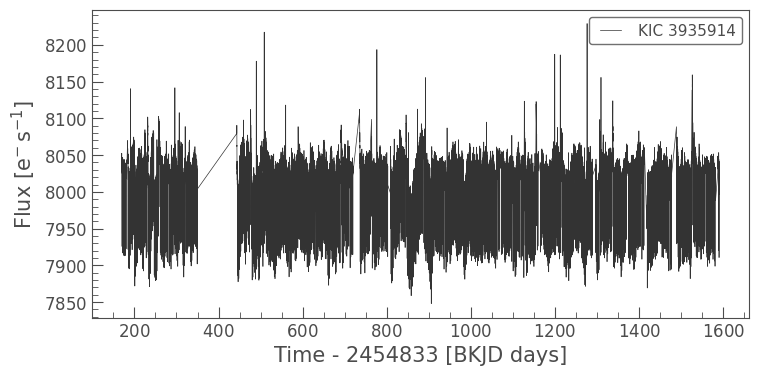

In [84]:
lc.plot()
plt.show()

We can change the default flux column with `.select_flux()`

In [85]:
lc_flat = lc.select_flux(flux_column="psf_flat_flux")

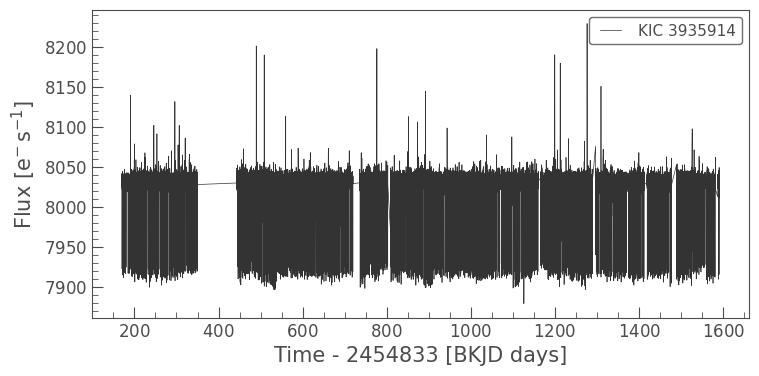

In [86]:
lc_flat.plot()
plt.show()

The attribute `meta` has metadata from the instrument, observations, and source. For example:
- `GAIAID` is the Gaia designation
- `KEPLERID` is the KIC value
- `TPFORG` is the TPF of origin where the source was detected
- `QDETECT` is an 18-long string with 1 if a source was detected in the quarter or 0 if not

In [87]:
lc.meta

{'EXTNAME': 'PRIMARY',
 'CHECKSUM': '7WaGATXE0TaE7TUE',
 'DATASUM': '0',
 'SIMPLE': True,
 'BITPIX': 8,
 'NAXIS': 0,
 'EXTEND': True,
 'NEXTEND': 2,
 'EXTVER': 1,
 'DOI': '10.17909/7jbr-w430',
 'HLSPID': 'KBONUS-BKG',
 'HLSPLEAD': 'Jorge martinez-Palomera',
 'HLSPVER': 'V1.0',
 'LICENSE': 'CC BY 4.0',
 'LICENURL': 'https://creativecommons.org/licenses/by/4.0/',
 'ORIGIN': 'PSFMACHINE',
 'DATE': '2022-07-27',
 'CREATOR': 'lightkurve.LightCurve.to_fits()',
 'TELESCOP': 'Kepler',
 'INSTRUME': 'Kepler Photometer',
 'FILTER': 'KEPLER',
 'TIMESYS': 'TDB',
 'OBJECT': 'KIC 3935914',
 'KEPLERID': 3935914,
 'RADESYS': 'ICRS',
 'RA_OBJ': 285.2138188787228,
 'DEC_OBJ': 39.02746125454957,
 'EQUINOX': 2016.0,
 'PROCVER': '2.0.9',
 'VERSION': '1.1.2',
 'APERTURE': 'PSF + SAP',
 'MISSION': 'Kepler',
 'OBSMODE': 'long cadence',
 'XPOSURE': 1765.464,
 'MJD-BEG': 54953.03907252848,
 'MJD-END': 56423.50139254052,
 'LABEL': 'KIC 3935914',
 'TARGETID': 'Gaia DR3 2100247945575646336',
 'KEPMAG': 15.529999732

### 2.1 Read quarter light curves

We can load a specific quarter by giving the `quarter` argument to the read method

In [92]:
lcq = lk.read(lc.filename, quarter=2)
lcq

time,flux,flux_err,cadenceno,sap_flux,centroid_col,sap_flux_err,centroid_column,centroid_row,sap_quality,sap_bkg,red_chi2,psf_flux_nova,psf_flux_err_nova
,electron / s,electron / s,,electron / s,pix,electron / s,pix,pix,,,,electron / s,electron / s
Time,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
169.52074926998466,7630.217904374363,3.264768996621107,2965,7043.306640625,497.9680940089214,4.015135288238525,497.9680940089214,408.7730212436989,393472,0.0,13090.60900554352,7693.928835633413,3.506596217749835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258.4673632183112,7798.2570391085565,3.5725741748899504,7318,6807.85791015625,498.0210091870951,4.000160217285156,498.0210091870951,408.51924787844405,0,0.0,13800.473508949392,7226.403847714606,3.415483239851062


If we try to load a quarter with no detection, it will return an empty light curve

In [93]:
lcq = lk.read(lc.filename, quarter=1)
lcq

time,flux,flux_err,cadenceno,sap_flux,centroid_col,sap_flux_err,centroid_column,centroid_row,sap_quality,sap_bkg,red_chi2,psf_flux_nova,psf_flux_err_nova
,electron / s,electron / s,,electron / s,pix,electron / s,pix,pix,,,,electron / s,electron / s
Time,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64


We can load all quarters into a Light Curve Collection object by iterating the quarters as

In [112]:
lcc = [lk.read(lc.filename, quarter=x) for x in range(0, 18)]
# clean empty quarters
lcc = lk.LightCurveCollection([x for x in lcc if len(x) > 0])
lcc

LightCurveCollection of 15 objects:
    0: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=2 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    1: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=3 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    2: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=5 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    3: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=6 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    4: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=7 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    5: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=8 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    6: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=9 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    7: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=10 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    8: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=11 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    9: <KeplerLightCurve LABEL="KIC 3935914" QUARTER=12 AUTHOR=KBONUS-BKG FLUX_ORIGIN=flux>
    10: <KeplerLightCurve LABEL="KIC 3935914" QUART

In [102]:
lcc[2]

time,flux,flux_err,cadenceno,sap_flux,centroid_col,sap_flux_err,centroid_column,centroid_row,sap_quality,sap_bkg,red_chi2,psf_flux_nova,psf_flux_err_nova
,electron / s,electron / s,,electron / s,pix,electron / s,pix,pix,,,,electron / s,electron / s
Time,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
443.4905270752497,7938.9468449386095,3.425925271403433,16373,7088.81689453125,497.40970133141025,4.166776180267334,497.40970133141025,403.6704305476911,16,1822.5032958984375,29546.869768469543,8096.624847754544,3.481504698379202
...,...,...,...,...,...,...,...,...,...,...,...,...,...
538.1632710890844,8974.59145092498,3.7947608693051684,21006,6853.69580078125,497.4685242086822,4.10567569732666,497.4685242086822,403.54566922709563,16,1363.934814453125,29083.93728193217,7187.512194598721,3.374688745939604


The quarter light curves have more columns:

- `time`: time array in BKJD
- `flux`: default flux column, this is the corrected PSF photometry
- `flux_err`: default flux error column, from the corrected PSF photometry
- `cadenceno`: cadence number value from the TPF
- `sap_flux`: aperture flux
- `sap_flux_err`: aperture flux error
- `centroid_column`: centroid column value
- `centroid_row`: centroid row value
- `sap_quality`: quality flag from the TPF
- `sap_bkg`: aperture flux from the background model
- `red_chi2`: reduce chi-square value from the PSF model
- `psf_flux_nova`: mean PSF flux
- `psf_flux_err_nova`: mean PSF flux error

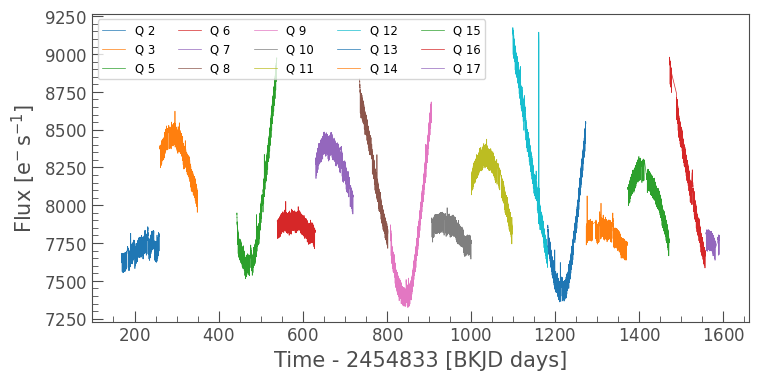

In [103]:
ax = lcc.plot()
ax.legend([f"Q {x}" for x in lcc.quarter], ncols=5, fontsize="small")
plt.show()

We can change the default flux column with `.select_flux()`

In [104]:
lcc_sap = lk.LightCurveCollection([x.select_flux(flux_column="sap_flux") for x in lcc])

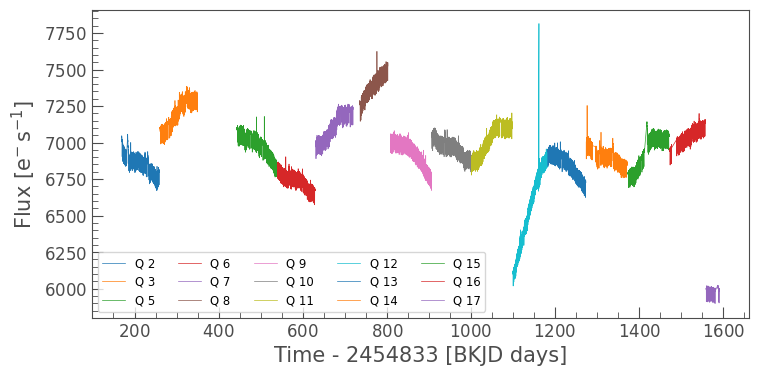

In [105]:
ax = lcc_sap.plot()
ax.legend([f"Q {x}" for x in lcc_sap.quarter], ncols=5, fontsize="small")
plt.show()

## 3. Warning

Some sources in KBonus-BKG were extracted with partial data, i.e. using pixels in the wing of the PSF, this is due to sources falling out of the edge of the TPF or because of saturated pixel rejection removed the central pixels of a bright source. 
The light curves provide the `psffrac` metric as the fraction of the PSF on the TPF used for photometry. This value is close to 1 for sources with full coverage and close to 0 for sources with partial data. LightKurve will show a warning when a source has `psffrac < 0.6` and also for sources brighter than $K_{p} < 12$ that produced saturated pixels that were avoided for model fitting.

In [113]:
lc = lk.search_lightcurve("Kepler-10", mission="Kepler", author="KBONUS-BKG").download()

/Users/jorgemarpa/Work/public_repos/lightkurve/src/lightkurve/search.py:480: LightkurveWarning: Warning: 19 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
Kepler magnitude is bright (less than 12), indicating the target is saturated. KBONUS-BKG data is invalid for saturated targets.
PSF Fraction is low, indicating not all of the flux is captured in the PSF model. This data may be unreliable.


In [114]:
lc.meta["KEPMAG"]

10.9610004425049

In [118]:
lcq = lk.read(lc.filename, quarter=2)
lcq

Kepler magnitude is bright (less than 12), indicating the target is saturated. KBONUS-BKG data is invalid for saturated targets.
PSF Fraction is low, indicating not all of the flux is captured in the PSF model. This data may be unreliable.


time,flux,flux_err,cadenceno,sap_flux,centroid_col,sap_flux_err,centroid_column,centroid_row,sap_quality,sap_bkg,red_chi2,psf_flux_nova,psf_flux_err_nova
,electron / s,electron / s,,electron / s,pix,electron / s,pix,pix,,,,electron / s,electron / s
Time,float64,float64,int32,float64,float64,float64,float64,float64,int32,float64,float64,float64,float64
169.51974208513275,296901.4407917318,35.48463688277593,2965,55391.66015625,655.449604353118,7.411260604858398,655.449604353118,250.63795690575847,256,0.0,245983.1902685441,300947.70202336845,36.107478828668675
...,...,...,...,...,...,...,...,...,...,...,...,...,...
258.4670207872987,302200.2129394214,37.869976908909734,7318,52152.3203125,655.4035519418761,7.2654314041137695,655.4035519418761,250.33718467545543,0,0.0,305202.6464676686,278168.5981922249,35.1327248641398


In [119]:
print(f"Quarter {lcq.quarter} \tPSFFRAC = {lcq.psffrac}")

Quarter 2 	PSFFRAC = 0.1763822145682909
